In [1]:
# Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel (r'Superstore.xls')

order_date_year = data["Order Date"].dt.year
data['Year'] = pd.DataFrame(order_date_year)
order_date_month = data["Order Date"].dt.month
data['Month'] = pd.DataFrame(order_date_month)

monthly_sales = data.groupby(['Year','Month'])['Sales'].sum()
newdata = pd.DataFrame(monthly_sales)
#newdata

newdata1 = data.groupby(['Year','Month'])['Profit'].sum()
newdata1 = pd.DataFrame(newdata1)
#newdata2

result_month = newdata.merge(newdata1, left_index=True, right_index=True)
result_month.reset_index(inplace=True)
result_month['Date'] = pd.to_datetime(result_month[['Year','Month']].assign(DAY=1))
tempmonth = result_month

## Task 6:
### Finding out the monthy growth rate and analyse the findings.

#### a.) Create a column in the monthly revenue dataset for monthly growth rate.

In [2]:
tempmonth['% Diff Sales'] = tempmonth.groupby(['Year','Month'])['Sales'].pct_change()
tempmonth['% Diff Profit'] = tempmonth.groupby(['Year','Month'])['Profit'].pct_change()
tempmonth

,Year,Month,Sales,Profit,Date,% Diff Sales,% Diff Profit
0,2014,1,14236.8950,2450.1907,2014-01-01,NaN,NaN
1,2014,2,4519.8920,862.3084,2014-02-01,-0.682523,-0.648065
2,2014,3,55691.0090,498.7299,2014-03-01,11.321314,-0.421634
3,2014,4,28295.3450,3488.8352,2014-04-01,-0.491923,5.995440
4,2014,5,23648.2870,2738.7096,2014-05-01,-0.164234,-0.215007
5,2014,6,34595.1276,4976.5244,2014-06-01,0.462902,0.817106
6,2014,7,33946.3930,-841.4826,2014-07-01,-0.018752,-1.169090
7,2014,8,27909.4685,5318.1050,2014-08-01,-0.177837,-7.319923
8,2014,9,81777.3508,8328.0994,2014-09-01,1.930093,0.565990
9,2014,10,31453.3930,3448.2573,2014-10-01,-0.615378,-0.585949


#### b.) Find out the maximum monthly growth rate

In [3]:
max_month_growth = tempmonth['% Diff Sales'].max()
max_month_index = tempmonth['% Diff Sales'].idxmax()
max_month = tempmonth.iloc[max_month_index]
max_growth = "{:.3f}".format(max_month['% Diff Sales'])
print("The maximum growth observed was:", max_growth,"%")

The maximum growth observed was: 11.321 %


#### c.) Plot the findings

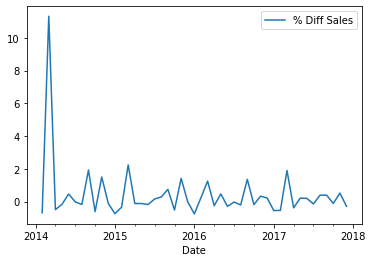

In [4]:
tempmonth['Date'] = pd.to_datetime(tempmonth[['Year','Month']].assign(DAY=1))
tempmonth.plot(x='Date',y=['% Diff Sales'])

#### d.) Describe the findings

In [5]:
print("Information of the month with the highest growth rate.")
max_month

Information of the month with the highest growth rate.


Year                            2014
Month                              3
Sales                          55691
Profit                        498.73
Date             2014-03-01 00:00:00
% Diff Sales                 11.3213
% Diff Profit              -0.421634
Name: 2, dtype: object

The growth rate (% difference in annual sales) for March 2014 was 11.3213% which was the highest growth rate observed in the dataset.